In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import math
import statistics
base_path = "D:\\rl_soccer\\2vs0\\junio_test_2022\\"

In [2]:
fig_plot = os.path.join(base_path, "figures")
if not os.path.exists(fig_plot):
    os.mkdir(fig_plot)

In [16]:

def get_data(base_path, id):
    pat = ["figure", "video", "pyt_save"]
    not_in = lambda x: all([not pat_l.lower() in x for pat_l in pat])
    progress = []
    run_progress = []
    model_names = []
    model_dict = {}
    model_list= []
    c = 0
    for exp in os.listdir(base_path):
        dir_path = f"{base_path}\\{exp}"
        if os.path.isdir(dir_path) and not_in(dir_path.split("\\")[-1]):
            exp_dir = os.listdir(dir_path)[0]
            the_path = f"{dir_path}\\{exp_dir}\\pyt_save\\"
            folder_list = os.listdir(the_path)
            folder_list.sort()
            for directory in folder_list:
                dir_path2 = f"{the_path}\\{directory}"
                the_path2 = f"{dir_path2}\\progress.txt"
                df = pd.read_csv(the_path2, delimiter="\t")
                model_list.append(os.path.join(exp_dir, "pyt_save",directory.split("_")[0]))
                df["model"] = [os.path.join(exp_dir, "pyt_save",directory.split("_")[0])]*len(df)
                df["exp_N"] = [id]*len(df)

                if directory[-4:] == "test":
                    progress.append(df)
                    c+=1
                else: 
                    success = df["success"].sum()/len(df)
                
                    if success<0.9:
                            progress.pop(-1)
                    else:
                        run_progress.append(df)     
                        model_names.append(directory.split('.')[0]) 
                    c+= 1
    if len(run_progress)>0:
        progress = pd.concat(progress)
        run_progress = pd.concat(run_progress)
    model_dict[id] = model_list
    return run_progress, progress, model_dict

In [17]:
experiments = os.listdir(base_path)
pat = ["figure", "video", "pyt_save"]
not_in = lambda x: all([not pat_l.lower() in x for pat_l in pat])
is_dir = lambda x: os.path.isdir(os.path.join(base_path, x))
experiments =  filter(is_dir, experiments)
run_progress_list = []
progress_list = []
model_dict = {}
i=0
for a_experiment in experiments:
    if not_in(a_experiment):
        experiment_path = os.path.join(base_path, a_experiment)
        run_progress, progress, model_dict_i= get_data(experiment_path, i)
        model_dict.update(model_dict_i)
        run_progress_list.append(run_progress)
        progress_list.append(progress)
        i+=1

run_progress = pd.concat(run_progress_list)
progress = pd.concat(progress_list)

C:\Users\rocho\AppData\Local\Temp\ipykernel_10492\3630889939.py:20: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(the_path2, delimiter="\t")
C:\Users\rocho\AppData\Local\Temp\ipykernel_10492\3630889939.py:20: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(the_path2, delimiter="\t")


In [8]:
del run_progress_list
del progress_list

In [9]:
data_info = []
for key in list(progress.groups.keys()):
    N_pass_per_match_p0 = []
    N_pass_per_match_p1 = []
    delta_game_steps = []
    had_pass_p0 = []
    had_pass_p1 = []
    wins = []
    progress_i = progress.get_group(key)
    games_start_end = [0]+[a for a in np.where(progress_i["done"])[0]]
    games_start_end = zip(games_start_end[:-1], games_start_end[1:])
    for game_start, game_end in games_start_end:
            game_n =  progress_i.iloc[game_start:game_end+1]
            N_passes =game_n[["received_pass_0", "received_pass_1"]]
            N_pass_per_match_p0.append(float(N_passes["received_pass_0"].sum()))
            N_pass_per_match_p1.append(float(N_passes["received_pass_1"].sum()))
            had_pass_p0.append(float(1 in (N_passes["received_pass_0"].unique())))
            had_pass_p1.append(float(1 in (N_passes["received_pass_1"].unique())))
            delta_game_steps.append(float(game_end-game_start))
            wins.append(float(game_n.iloc[-1]["goal_H_A"]))
    data_dict = {
    "median_pass_p0": statistics.median(N_pass_per_match_p0),
    "mean_pass_p0": statistics.mean(N_pass_per_match_p0),
    "std_pass_p0": statistics.stdev(N_pass_per_match_p0),
    "max_pass_p0": max(N_pass_per_match_p0),
    "count_pass_p0": had_pass_p0.count(1),

    "count_pass_p1": had_pass_p1.count(1),
    "median_pass_p1": statistics.median(N_pass_per_match_p1),
    "mean_pass_p1": statistics.mean(N_pass_per_match_p1),
    "std_pass_p1" :statistics.stdev(N_pass_per_match_p1),
    "max_pass_p1" : max(N_pass_per_match_p1),


    "mean_steps":statistics.mean(delta_game_steps),
    "median_steps": statistics.median(delta_game_steps),
    "std_steps": statistics.stdev(delta_game_steps),
    "mean_wins" :statistics.mean(wins),
    "median_wins":statistics.median(wins),
    "count_wins": wins.count(1),
    "std_wins": statistics.stdev(wins)
    }
    data_info.append(data_dict)


pass_information = pd.DataFrame(data_info, columns=data_dict.keys(), 
                                                                index=list(progress.groups.keys()))

AttributeError: 'DataFrame' object has no attribute 'groups'

In [ ]:
pass_information

,median_pass_p0,mean_pass_p0,std_pass_p0,max_pass_p0,count_pass_p0,count_pass_p1,median_pass_p1,mean_pass_p1,std_pass_p1,max_pass_p1,mean_steps,median_steps,std_steps,mean_wins,median_wins,count_wins,std_wins
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_13-30-18_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model1799999.pt_instance_test)",0.0,0.170,0.448891,3.0,72,79,0.0,0.178,0.445773,3.0,110.330,81.5,75.322347,0.836,1.0,459,0.549279
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_13-53-47_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2479999.pt_instance_test)",0.0,0.134,0.395420,3.0,59,66,0.0,0.152,0.416224,3.0,84.790,70.5,48.330296,0.968,1.0,491,0.243093
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_14-24-17_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2849999.pt_instance_test)",0.0,0.088,0.335382,3.0,38,37,0.0,0.082,0.308977,3.0,75.620,66.0,38.656957,0.980,1.0,495,0.199197
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_14-56-42_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2399999.pt_instance_test)",0.0,0.110,0.355179,3.0,50,60,0.0,0.130,0.370641,3.0,81.552,69.0,42.044200,0.984,1.0,496,0.178347
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_15-22-11_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2569999.pt_instance_test)",0.0,0.104,0.342664,2.0,46,49,0.0,0.108,0.341422,2.0,83.016,70.0,47.376374,0.972,1.0,493,0.235216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(5, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_11-21-23_\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2079999.pt_instance_test)",0.0,0.178,0.476203,5.0,76,50,0.0,0.120,0.417071,4.0,88.910,71.0,55.849765,0.940,1.0,485,0.341516
"(5, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_11-47-27_\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2949999.pt_instance_test)",0.0,0.144,0.389316,2.0,65,36,0.0,0.084,0.324275,3.0,75.362,63.0,42.287722,0.972,1.0,493,0.235216
"(5, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_11-54-49_\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model1959999.pt_instance_test)",0.0,0.192,0.446693,3.0,86,56,0.0,0.134,0.405429,3.0,92.820,73.5,60.647703,0.920,1.0,480,0.392311
"(5, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_12-25-07_\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2779999.pt_instance_test)",0.0,0.142,0.440709,5.0,61,32,0.0,0.080,0.381958,6.0,75.878,64.0,41.695133,0.972,1.0,493,0.235216


In [ ]:
pass_goal_per_team = pd.DataFrame(index=list(progress.groups.keys()))
pass_goal_per_team["p0_score"] = progress.apply(lambda x: x[(x["last_hit"]=='HOME_id=0') & (x["goal_H_A"]==1)].count()["done"]/500)
pass_goal_per_team["p1_score"] = progress.apply(lambda x: x[(x["last_hit"]=='HOME_id=1') & (x["goal_H_A"]==1)].count()["done"]/500)
pass_goal_per_team["pass_p0"] = progress.apply(lambda x: x[(x["received_pass_0"]) == 1].count()["done"]/500)
pass_goal_per_team["pass_p1"] = progress.apply(lambda x: x[(x["received_pass_1"]) == 1].count()["done"]/500)
pass_goal_per_team["successful_games"] = progress.apply(lambda x: x[(x["goal_H_A"]==1)].count()["done"]/500)


In [ ]:
united_matrices = pd.concat([pass_goal_per_team, pass_information], axis=1)

In [ ]:
united_matrices

,p0_score,p1_score,pass_p0,pass_p1,successful_games,median_pass_p0,mean_pass_p0,std_pass_p0,max_pass_p0,count_pass_p0,...,mean_pass_p1,std_pass_p1,max_pass_p1,mean_steps,median_steps,std_steps,mean_wins,median_wins,count_wins,std_wins
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_13-30-18_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model1799999.pt_instance_test)",0.538,0.380,0.170,0.178,0.918,0.0,0.170,0.448891,3.0,72,...,0.178,0.445773,3.0,110.330,81.5,75.322347,0.836,1.0,459,0.549279
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_13-53-47_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2479999.pt_instance_test)",0.638,0.344,0.134,0.152,0.982,0.0,0.134,0.395420,3.0,59,...,0.152,0.416224,3.0,84.790,70.5,48.330296,0.968,1.0,491,0.243093
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_14-24-17_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2849999.pt_instance_test)",0.642,0.348,0.088,0.080,0.990,0.0,0.088,0.335382,3.0,38,...,0.082,0.308977,3.0,75.620,66.0,38.656957,0.980,1.0,495,0.199197
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_14-56-42_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2399999.pt_instance_test)",0.598,0.394,0.106,0.126,0.992,0.0,0.110,0.355179,3.0,50,...,0.130,0.370641,3.0,81.552,69.0,42.044200,0.984,1.0,496,0.178347
"(0, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_15-22-11_\2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2569999.pt_instance_test)",0.652,0.334,0.104,0.108,0.986,0.0,0.104,0.342664,2.0,46,...,0.108,0.341422,2.0,83.016,70.0,47.376374,0.972,1.0,493,0.235216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(5, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_11-21-23_\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2079999.pt_instance_test)",0.560,0.410,0.174,0.120,0.970,0.0,0.178,0.476203,5.0,76,...,0.120,0.417071,4.0,88.910,71.0,55.849765,0.940,1.0,485,0.341516
"(5, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_11-47-27_\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2949999.pt_instance_test)",0.514,0.472,0.140,0.084,0.986,0.0,0.144,0.389316,2.0,65,...,0.084,0.324275,3.0,75.362,63.0,42.287722,0.972,1.0,493,0.235216
"(5, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_11-54-49_\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model1959999.pt_instance_test)",0.616,0.344,0.186,0.134,0.960,0.0,0.192,0.446693,3.0,86,...,0.134,0.405429,3.0,92.820,73.5,60.647703,0.920,1.0,480,0.392311
"(5, D:\rl_soccer\2vs0\junio_test_2022\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\2022-07-02_12-25-07_\2022-06-08_23-04-18_td3_soccer_goal_orig_concat_2vs0_0.1\pyt_save\\model2779999.pt_instance_test)",0.526,0.460,0.140,0.076,0.986,0.0,0.142,0.440709,5.0,61,...,0.080,0.381958,6.0,75.878,64.0,41.695133,0.972,1.0,493,0.235216


In [ ]:
united_matrices.to_csv(os.path.join(base_path, "united_matrices.tsv"), sep='\t')

In [46]:
united_matrices = pd.read_csv(os.path.join(base_path, "united_matrices.tsv"), sep='\t')
united_matrices.rename(columns={united_matrices.columns[0]: "path_N_exp"}, inplace=True)
united_matrices["N_exp"] = united_matrices.apply((lambda x: x["path_N_exp"].split(',')[0][1:]), axis=1)
united_matrices["model_path"] = united_matrices.apply((lambda x: os.path.join(*list(filter(None, x["path_N_exp"].split(',')[1][:-1].split("\\")))[-3:]).replace("_instance_test'", "")), axis=1)
united_matrices["pass_average"] = (united_matrices["count_pass_p0"]+united_matrices["count_pass_p1"])/500
#united_matrices = united_matrices.groupby("N_exp")

In [47]:
united_matrices["model_path"][0]

'2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model1799999.pt'

In [21]:
pass_wins_over500 = united_matrices.mean()[["count_pass_p0", "count_pass_p1", "count_wins"]]/500
goal_scored_over500 = united_matrices.mean()[["p0_score", "p1_score"]]


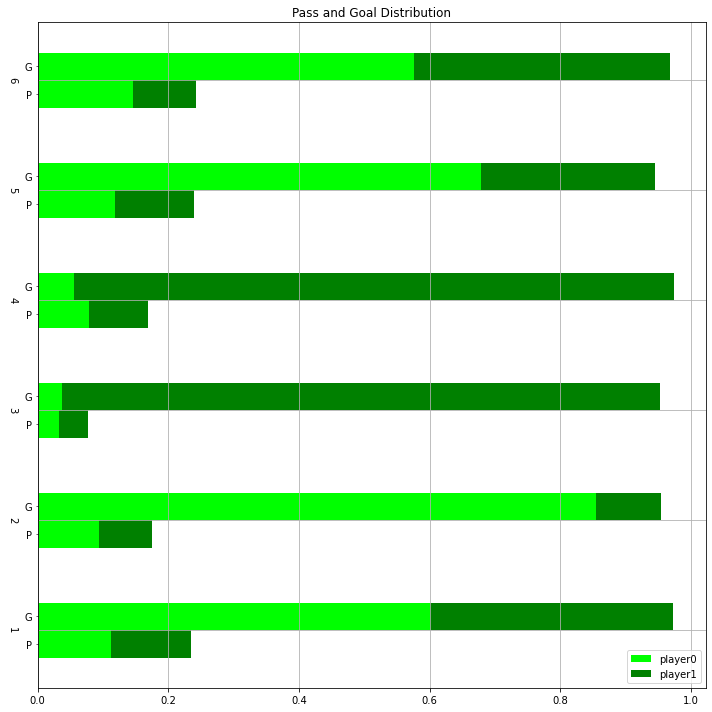

In [22]:
N_experiments = np.arange(1, len(pass_wins_over500.index)+1)
width = 0.5
tick_pass = ["P"]*len(N_experiments)+["G"]*len(N_experiments)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.barh(N_experiments-.25, pass_wins_over500["count_pass_p0"], align='edge', height=.25, color='#00ff00',label='player0')
ax.barh(N_experiments, goal_scored_over500["p0_score"], align='edge', height=.25, color='#00ff00')
ax.set_title('Pass and Goal Distribution')

ax.grid(True)

ax2 = plt.gca()
pos = []
for bar in ax2.patches:
    pos.append(bar.get_y()+0.25/2.)


ax2.set_yticks(pos, minor=True)

ax2.set_yticklabels(tick_pass, minor=True, rotation=0)
ax2.tick_params(axis='y', which='major', pad=20, size=0.5)
plt.setp(ax.get_yticklabels(), rotation=-90)

ax.barh(N_experiments-0.25, pass_wins_over500["count_pass_p1"], align='edge', height=.25, left=pass_wins_over500["count_pass_p0"], color='g',label='player1')
ax.barh(N_experiments, goal_scored_over500["p1_score"], align='edge', height=.25, left=goal_scored_over500["p0_score"], color='g')


ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(base_path,"Pass_Goal.jpg"), bbox_inches='tight')

In [48]:
model_dict = {}
for index in united_matrices["N_exp"].unique():
    mean_success = np.median(united_matrices["successful_games"])
    result = united_matrices[united_matrices["N_exp"]==index]
    result = result[(result["successful_games"]>mean_success) & (result["pass_average"]>0.15)]
    result = result.sort_values(by=[ "pass_average", "successful_games"], ascending=False)
    if len(result)>0:
        model_dict[index] = result[["model_path","successful_games", "pass_average"]].iloc[:5].values.tolist()

In [49]:
model_dict

{'0': [['2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model1939999.pt',
   0.976,
   0.348],
  ['2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model1959999.pt',
   0.98,
   0.306],
  ['2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model2289999.pt',
   0.974,
   0.3],
  ['2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model2109999.pt',
   0.974,
   0.296],
  ['2022-06-08_23-03-58_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model2269999.pt',
   0.98,
   0.29]],
 '1': [['2022-06-09_07-59-36_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model1989999.pt',
   0.976,
   0.188],
  ['2022-06-09_07-59-36_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model2709999.pt',
   0.978,
   0.16],
  ['2022-06-09_07-59-36_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model2769999.pt',
   0.98,
   0.158],
  ['2022-06-09_07-59-36_td3_soccer_goal_orig_concat_2vs0_0.1\\pyt_save\\model2699999.pt',
   0.978,
   0.152

In [28]:
[len(select) for select in model_dict.values()]

[5, 4, 5, 5, 5]

In [50]:
import json

with open(os.path.join(base_path, "selected_models.json"), "w") as write_file:
    json.dump(model_dict, write_file)

KeyError: 0

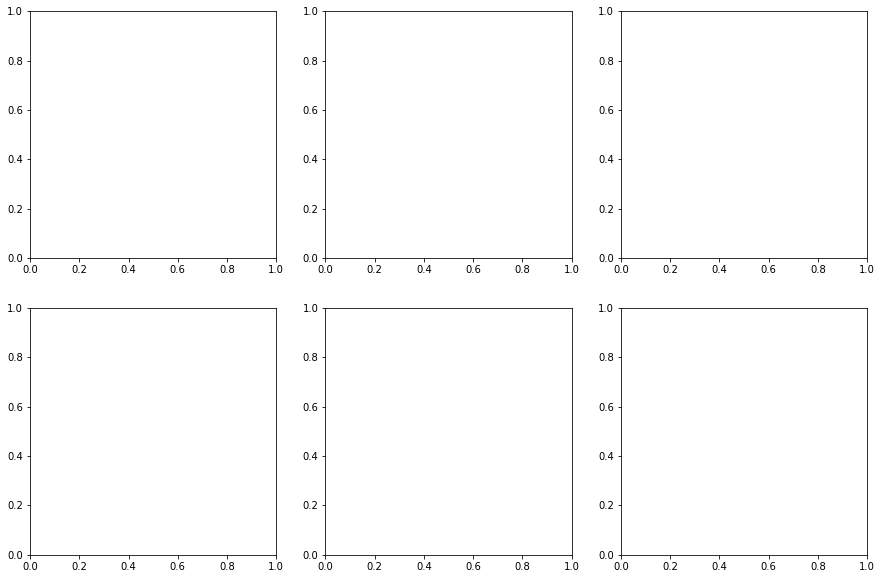

In [29]:
from itertools import chain
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for index in united_matrices["N_exp"].unique():
    result = united_matrices[united_matrices["N_exp"]==index]
    result = result[result["successful_games"]>0.9]
    i_real = int(index)
    model_dict_i = model_dict[i_real]
    i, j = int(int(index)>2), int(int(index)%3)    
    index_degree = result.index
    pass_average = (result["count_pass_p0"]+result["count_pass_p1"]).values/500
    success = result["successful_games"].values
    mean_steps = result["mean_steps"].values
    mean_steps = 100*(mean_steps-np.min(mean_steps))/(np.max(mean_steps)-np.min(mean_steps))
    a = ax[i, j].scatter(pass_average,  success, c=index_degree, s=mean_steps)
    handles, labels = a.legend_elements(prop="sizes", alpha=0.6, num=5)
    labels = [int((np.max(mean_steps)-np.min(mean_steps))*int("".join(x for x in label if x.isdigit()))/100+ np.min(mean_steps)) for label in labels]
    ax[i,j].legend(handles, labels, title="mean_steps")
    ax[i,j].set_xlabel("Pass Average")
    ax[i,j].set_ylabel("Success Rate")
    ax[i,j].set_title(f"run_{i_real+1}")
    ax[i,j].set_xlim(0, 0.7)
    ax[i, j].set_ylim(0.9, 1)
    ax[i,j].grid()


cbar_ax = fig.add_axes([0.95, 0.2, 0.05, 0.5])

vel_color = fig.colorbar(a, cax=cbar_ax)
vel_color.set_label("sumed std velocity", rotation=270, labelpad=25)
fig.suptitle("Agents Success Rate vs Pass Average Step")    
#plt.show()
plt.savefig(os.path.join(base_path,"all.jpg"), bbox_inches='tight')

from cs

In [ ]:
game_end_list = []
game_failed_list =[]
game_succ_list = []
for progress in progress_list:
    game_end_list.append([a for a in np.where(progress["done"])[0]])
    game_succ_list.append([a for a in np.where(progress["done"]*progress["goal_H_A"] == 1)[0]])
    game_failed_list.append([a for a in np.where(progress["done"]*progress["goal_H_A"] == -1)[0]])


In [ ]:
pitch_size_list= [run_progress.iloc[list(np.where(run_progress["success"]==1)[0])]["pitch_size"].str.split(",") for run_progress in run_progress_list]

In [ ]:
pitch_size_list= [run_progress.iloc[list(np.where(run_progress["success"]==1)[0])]["pitch_size"].str.split(",") for run_progress in run_progress_list]
pitch_size = [[(round(float(pitch_s[0][1:]),1), round(float(pitch_s[1][:-1]), 1))for pitch_s in pitch_size] for pitch_size in pitch_size_list]

In [ ]:
run_progress_list[0].columns

In [ ]:
game_failed_progress = zip(game_failed_list, progress_list, game_end_list)
for game_failed, progress, game_end in game_failed_progress:
    while game_failed != []:
        print(len(game_failed))
        final_ind = game_end.index(game_failed[-1])
        final = game_failed[-1]
        start_ind = game_end[final_ind-1]
        index_list = progress.index[start_ind+1:final+1]
        progress.drop(index_list, 0, inplace=True)
        game_end = [a for a in np.where(progress["done"]==1)[0]]
        game_failed = [a for a in np.where(progress["done"]*progress["goal_H_A"] == -1)[0]]

In [ ]:
[progress.reset_index(drop=True, inplace=True) for progress in progress_list]

In [ ]:
game_end_list = []
game_succ_list = []
for progress in progress_list:
    game_end_list.append([a for a in np.where(progress["done"])[0]])
    game_succ_list.append([a for a in np.where(progress["done"]*progress["goal_H_A"] == 1)[0]])
passes_index = (list(progress["received_pass_1"][progress["received_pass_1"]==1].index) + 
                        list(progress["received_pass_0"][progress["received_pass_0"]==1].index))
passes_index.sort()

In [ ]:
hit_d_list = [[a for a in np.where(progress["hit_H_A"]==1)[0]] for progress in progress_list]

In [ ]:
hits_list = [[a for a in np.where(progress["hit"]==1)[0]] for progress in progress_list]

In [ ]:
ball_out = [[a for a in np.where(progress["goal_H_A"]*(1-progress["done"])==1)[0]] for progress in progress_list]

In [ ]:
x0_list = []
x1_list = []
for game_end, progress, pitch_size in zip(game_end_list, progress_list, pitch_size_list):
    score_x0 = []
    score_y0 = []
    score_x1 = []
    score_y1 = []
    x0_pos = []
    y0_pos = []
    x1_pos = []
    y1_pos = []
    xb_pos = []
    yb_pos = []
    pitch_x = 24
    pitch_y = 18
    prev_index = 0
    for game_n, index in enumerate(game_end):
        px, py = pitch_size[game_n][0]
        
        if progress["last_hit"].iloc[index] == "HOME_id=0":
            score_x0 += [pitch_x*np.round(progress["player_0_pos_x"].iloc[index-1],1)/px]
            score_y0 += [pitch_y*np.round(progress["player_0_pos_y"].iloc[index-1],1)/py]
        elif progress["last_hit"].iloc[index] == "HOME_id=1":
            score_x1 += [pitch_x*np.round(progress["player_1_pos_x"].iloc[index-1],1)/px]
            score_y1 += [pitch_y*np.round(progress["player_1_pos_y"].iloc[index-1],1)/py]

        x0_pos_n = list(pitch_x*np.round(progress["player_0_pos_x"].iloc[prev_index:index+1],1)/px)
        y0_pos_n =  list(pitch_y*np.round(progress["player_0_pos_y"].iloc[prev_index:index+1],1)/py)
        x1_pos_n = list(pitch_x*np.round(progress["player_1_pos_x"].iloc[prev_index:index+1],1)/px)
        y1_pos_n =  list(pitch_y*np.round(progress["player_1_pos_y"].iloc[prev_index:index+1],1)/py)
        xb_pos_n = list(pitch_x*np.round(progress['ball_position_x'].iloc[prev_index:index+1],1)/px)
        yb_pos_n =  list(pitch_y*np.round(progress['ball_position_y'].iloc[prev_index:index+1],1)/py)    
        
        x0_pos.append(x0_pos_n[-1])
        y0_pos.append(y0_pos_n[-1])
        x1_pos.append(x1_pos_n[-1])
        y1_pos.append(y1_pos_n[-1])
        xb_pos.append(xb_pos_n[-1])
        yb_pos.append(yb_pos_n[-1])
        prev_index = index+1
    x0_pos = np.array(x0_pos)[..., np.newaxis]
    y0_pos = np.array(y0_pos)[..., np.newaxis]
    x1_pos = np.array(x1_pos)[..., np.newaxis]
    y1_pos = np.array(y1_pos)[..., np.newaxis]
    xb_pos = np.array(xb_pos)[..., np.newaxis]
    yb_pos = np.array(yb_pos)[..., np.newaxis]
    x0_list.append(x0_pos)
    x1_list.append(x1_pos)


In [ ]:
progress_list[0].columns

In [ ]:
scorex0_list = []
scorex1_list = []
for game_end, progress, pitch_size in zip(game_end_list, progress_list, pitch_size_list):
    score_x0 = []
    score_x1 = []
    prev_index = 0
    for game_n, index in enumerate(game_end):
        
        if progress["last_hit"].iloc[index] == "HOME_id=0":
            score_x0 += [np.round(progress["player_0_pos_x"].iloc[index-1],1)]
            score_y0 += [np.round(progress["player_0_pos_y"].iloc[index-1],1)]
        elif progress["last_hit"].iloc[index] == "HOME_id=1":
            score_x1 += [np.round(progress["player_1_pos_x"].iloc[index-1],1)]
            score_y1 += [np.round(progress["player_1_pos_y"].iloc[index-1],1)]
        prev_index = index+1
    scorex0_list.append(score_x0)
    scorex1_list.append(score_x1)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
import seaborn as sns

colors = [(0,0,0), (0, 1, 1), (0, 1, 0.75), (0, 1, 0), (0.75, 1, 0),
          (1, 1, 0), (1, 0.8, 0), (1, 0.7, 0), (1, 0, 0)]
img = mpimg.imread('futbol_field.png')

x_pos = [x0_pos, x1_pos, score_x0, score_x1, xb_pos]
y_pos = [y0_pos, y1_pos, score_y0, score_y1, yb_pos]
labels = ["p0_pos", "p1_pos", "p0_score_pos", "p1_score_pos", "ball_pos_at_score"]
position = zip(x_pos, y_pos)
#cm = LinearSegmentedColormap.from_list('sample', colors)
fig=plt.figure(figsize=(10,7))
columns = 3
rows = 2
for i, x in enumerate(position):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img.transpose(1,0,2),  origin='lower', extent=[-18, 18, -24, 24])
    plt.scatter(x[1], x[0], color=colors[i])
    plt.title(labels[i])
plt.savefig(os.path.join(fig_plot, "PositionPlot.jpg"))


In [ ]:
experiments = [f"run_{i+1}" for i in range(len(progress_list))]
receivers = ["player 0", "player1"]
received_pass_list = [[np.sum(progress["received_pass_0"]), np.sum(progress["received_pass_1"])] for progress in progress_list]
total_pass = [sum(received_pass) for received_pass in received_pass_list]
received_pass = [pass_pi/tot_pass for pass_pi, tot_pass in zip(received_pass_list, total_pass)]
#plt.savefig(os.path.join(fig_plot, "Passes.jpg"))

In [ ]:
scored_goals_list = np.array([[len(score_x0), len(score_x1)] for score_x0, score_x1 in zip(scorex0_list, scorex1_list)])
total_goals_list = np.sum(scored_goals_list, axis=-1, keepdims=True)
total_goal_percentage = scored_goals_list/total_goals_list

In [ ]:
total_goal_percentage

In [ ]:
received_pass = np.array(received_pass)
print(received_pass.shape)

In [ ]:
N_experiments = np.arange(1, len(experiments)+1)
width = 0.5
tick_pass = ["P"]*len(N_experiments)+["G"]*len(N_experiments)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.barh(N_experiments-.25, received_pass[:, 0], align='edge', height=.25, color='#00ff00',label='player0')
ax.barh(N_experiments, total_goal_percentage[:, 0], align='edge', height=.25, color='#00ff00')
ax.set_title('Pass and Goal Distribution')

ax.grid(True)

ax2 = plt.gca()
pos = []
for bar in ax2.patches:
    pos.append(bar.get_y()+0.25/2.)


ax2.set_yticks(pos, minor=True)

ax2.set_yticklabels(tick_pass, minor=True, rotation=0)
ax2.tick_params(axis='y', which='major', pad=20, size=0.5)
plt.setp(ax.get_yticklabels(), rotation=-90)

ax.barh(N_experiments-0.25, received_pass[:, 1], align='edge', height=.25, left=received_pass[:, 0], color='g',label='player1')
ax.barh(N_experiments, total_goal_percentage[:, 1], align='edge', height=.25, left=total_goal_percentage[:, 0], color='g')


ax.legend()
plt.tight_layout()
plt.savefig(os.path.join(base_path,"Pass_Goal.jpg"), bbox_inches='tight')

In [ ]:
import squarify
import matplotlib.pyplot as plt
squarify.plot(sizes=total_pass, label=experiments, color=["red", "green", "blue", "grey", "orange", "pink"],alpha=.4 )
plt.axis('off')
plt.title("Amount of passes")
plt.savefig(os.path.join(base_path,"NPass.jpg"), bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots()
receivers = ["player 0", "player1"]
scored_goals = [len(score_x0), len(score_x1)]
total_goals = sum(scored_goals)
scored_goals = [goal_pi/total_goals for goal_pi in scored_goals]
plt.bar(receivers, scored_goals)
plt.title("Amount of Goals Scored")
plt.savefig(os.path.join(fig_plot, "Goals.jpg"))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

fig, axs = plt.subplots(2, 3, figsize=(10, 10))
for i, progress in enumerate(progress_list):
    title = f"run_{i+1}"
    i, j = int(i>2), int(i%3)
    sns.histplot(data=progress["2_hit_dist"].iloc[np.where(progress["2_hit_dist"]>0.5)[0]], stat='density',kde=True, ax=axs[i, j])
    axs[i,j].set_xlim(0, 15)
    axs[i,j].set_title(title)
    axs[i,j].grid(True)
fig.suptitle("consecutive hit distribution")
plt.savefig(os.path.join(base_path,"2hitDist.jpg"), bbox_inches='tight')

In [ ]:
np.median(progress["2_hit_dist"].iloc[np.where(progress["2_hit_dist"]>0)[0]])

In [ ]:
diff =np.hstack([x0_pos, y0_pos]) - np.hstack([x1_pos, y1_pos])
diff2 = np.square(diff)
mse = np.sqrt(np.sum(diff2, axis=1))
plt.hist(mse, density=True)
plt.title("player distance in scored matches")
plt.xlabel("player distance")
plt.ylabel("frequency")
plt.savefig(os.path.join(fig_plot, "D_scored.jpg"))

In [ ]:
x = np.arange(-24, 25, 1)
y = np.arange(-18, 19, 1)
xx, yy = np.meshgrid(x, y)
print(xx.shape, yy.shape)

In [ ]:
#volver el cálculo de la parte inferior matricial
progress.index

In [ ]:
import statistics
vel1 = np.zeros((yy.shape[0], xx.shape[1]))
freq1 = np.zeros((yy.shape[0], xx.shape[1]))
vel0 = np.zeros((yy.shape[0], xx.shape[1]))
freq0 = np.zeros((yy.shape[0], xx.shape[1]))
closest = lambda M, x: np.argmin(np.abs(x-M))

for p_i in progress.index:

    x1, y1 = progress.iloc[p_i]["player_1_pos_x"], progress.iloc[p_i]["player_1_pos_y"]
    x0, y0 = progress.iloc[p_i]["player_0_pos_x"], progress.iloc[p_i]["player_0_pos_y"]
    ix1, iy1 = closest(xx[0,:], x1), closest(yy[:, 0], y1)
    vel1[iy1, ix1] = statistics.mean([vel1[iy1, ix1], progress.iloc[p_i]["vel_1"]])
    freq1[iy1, ix1] += 1
    ix0, iy0 = closest(xx[0,:], x0), closest(yy[:, 0], y0)
    vel0[iy0, ix0] = statistics.mean([vel0[iy0, ix0], progress.iloc[p_i]["vel_0"]])
    freq0[iy0, ix0] += 1

freq1 /= len(progress.index)
freq0 /= len(progress.index)



In [ ]:
print(np.max(vel1), np.min(vel1))
print(np.max(vel0), np.min(vel0))

In [ ]:
freq1 = freq1/(np.max(freq1) - np.min(freq1))
freq0 = freq0/(np.max(freq0) - np.min(freq0))
vel1 = 2*(vel1-np.min(vel1))/(np.max(vel1) - np.min(vel1))-1
print(np.max(vel1), np.min(vel1))

In [ ]:

vel0 = 2*(vel0-np.min(vel0))/(np.max(vel0) - np.min(vel0))-1 
print(np.max(vel0), np.min(vel0))

#FIXME: 
1. PASAR CANCHA A BLANCO (listo)
2. verificar proporciones cancha
3. Reescalar entre 0 y 1. (listo)
4. ver mejor combinación de alphas. (listo)
5. campo con flechas. (listo)
6. dejar de la misma forma color maps (listo)
7. como proseguir en entrenamiento
8. Ver posibilidad de correr en docker.
quiver

In [ ]:

def generate_field(ax, pitch_size=[24, 18]):

    rg = 7.32/90
    rgs = (11 + 7.32)/90
    ra = 40.32/90
    rav = 16.5/60
    rac = 5.5/60

   

    #Pitch Outline & Centre Line
    plt.plot([-pitch_size[0],-pitch_size[0]],[-pitch_size[1],pitch_size[1]], color="black")
    plt.plot([-pitch_size[0], pitch_size[0]],[pitch_size[1],pitch_size[1]], color="black")
    plt.plot([pitch_size[0], pitch_size[0]],[-pitch_size[1],pitch_size[1]], color="black")
    plt.plot([-pitch_size[0], pitch_size[0]],[-pitch_size[1], -pitch_size[1]], color="black")
    plt.plot([0,0],[-pitch_size[1],pitch_size[1]], color="black")

    # circles of the center:
    centreCircle = plt.Circle((0,0), 0.1*pitch_size[1] ,color="black",fill=False)
    ax.add_patch(centreCircle)


    #Area grande Izquierda
    plt.plot([-pitch_size[0]+pitch_size[0]*rav, -pitch_size[0]+pitch_size[0]*rav], [-pitch_size[1]*ra, pitch_size[1]*ra], 
                color="black")
    plt.plot([-pitch_size[0], -pitch_size[0] + pitch_size[0]*rav],[-pitch_size[1]*ra, -pitch_size[1]*ra],color="black")
    plt.plot([-pitch_size[0], -pitch_size[0] + pitch_size[0]*rav],[pitch_size[1]*ra, pitch_size[1]*ra],color="black")



    #Area grande derecha
    plt.plot([pitch_size[0]-pitch_size[0]*rav, pitch_size[0]-pitch_size[0]*rav], [-pitch_size[1]*ra, pitch_size[1]*ra], 
                color="black")
    plt.plot([pitch_size[0], pitch_size[0] - pitch_size[0]*rav],[-pitch_size[1]*ra, -pitch_size[1]*ra],color="black")
    plt.plot([pitch_size[0], pitch_size[0] - pitch_size[0]*rav],[pitch_size[1]*ra, pitch_size[1]*ra],color="black")


    #Area Chica izquierda
    plt.plot([-pitch_size[0], -pitch_size[0] + rac*pitch_size[0]],[-pitch_size[1]*rav, -pitch_size[1]*rav],color="black")
    plt.plot([-pitch_size[0], -pitch_size[0] + rac*pitch_size[0]],[pitch_size[1]*rav, pitch_size[1]*rav],color="black")
    plt.plot([-pitch_size[0]+rac*pitch_size[0]]*2, [-pitch_size[1]*rav, pitch_size[1]*rav], color="black")

    #Area Chica derecha
    plt.plot([pitch_size[0], pitch_size[0] - rac*pitch_size[0]],[-pitch_size[1]*rav, -pitch_size[1]*rav],color="black")
    plt.plot([pitch_size[0], pitch_size[0] - rac*pitch_size[0]],[pitch_size[1]*rav, pitch_size[1]*rav],color="black")
    plt.plot([pitch_size[0]-rac*pitch_size[0]]*2, [-pitch_size[1]*rav, pitch_size[1]*rav], color="black")


    #Tidy Axes
    #plt.axis('off')

    #sns.kdeplot(data["Xstart"],data["Ystart"], shade=True,n_levels=50)
    #plt.ylim(-pitch_size[1], pitch_size[1])
    #plt.xlim(-pitch_size[0], pitch_size[0])




In [ ]:
vel0  = vel0*freq0
vel0[vel0==0.000] = np.nan
freq0[freq0==0.000] = np.nan

In [ ]:
vel1  = vel1*freq1
vel1[vel1==0.000] = np.nan
freq1[freq1==0.000] = np.nan

In [ ]:

#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
generate_field(ax)
#sns.kdeplot(progress["player_0_pos_x"], progress["player_0_pos_y"], shade="True", alpha=.5, color="red")
p = ax.pcolor(xx,yy,freq0, cmap = plt.get_cmap("Reds"), alpha=0.6)
q = ax.pcolor(xx, yy, vel0, cmap = plt.get_cmap("BrBG"), alpha=0.47)


vel_color = plt.colorbar(q)
freq_color = plt.colorbar(p)
freq_color.ax.set_title("frequency")
vel_color.ax.set_title("velocity")
plt.title("heatmap of position and velocity to ball player 0", y=-0.2)

plt.savefig(os.path.join(base_path, "vel_freq_p0.jpg"))

# color value with maximum


In [ ]:

#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
generate_field(ax)
#sns.kdeplot(progress["player_0_pos_x"], progress["player_0_pos_y"], shade="True", alpha=.5, color="red")
p = ax.pcolor(xx,yy,freq1, cmap = plt.get_cmap("Reds"), alpha=0.6)
q = ax.pcolor(xx, yy, vel1, cmap = plt.get_cmap("BrBG"), alpha=0.47)


vel_color = plt.colorbar(q)
freq_color = plt.colorbar(p)
freq_color.ax.set_title("frequency")
vel_color.ax.set_title("velocity")
plt.title("heatmap of position and velocity to ball player 1", y=-0.2)

plt.savefig(os.path.join(fig_plot, "vel_freq_p1.jpg"))

# color value with maximum


In [ ]:

#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
generate_field(ax)
sns.kdeplot(progress["player_1_pos_x"], progress["player_1_pos_y"], shade="True", alpha=.5, color="red")
#p = ax.pcolor(xx,yy,freq0, cmap = plt.get_cmap("Reds"), alpha=0.6)
#q = ax.pcolor(xx, yy, vel0, cmap = plt.get_cmap("BrBG"), alpha=0.47)


#vel_color = plt.colorbar(q)
#freq_color = plt.colorbar(p)
#freq_color.ax.set_title("frequency")
#vel_color.ax.set_title("velocity")
plt.title("heatmap of position through out the game of player 1", y=-0.2)

plt.savefig(os.path.join(fig_plot, "heat_map_p1.jpg"))

# color value with maximum


In [ ]:

#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
generate_field(ax)
sns.kdeplot(progress["player_0_pos_x"], progress["player_0_pos_y"], shade="True", alpha=.5, color="red")
#p = ax.pcolor(xx,yy,freq0, cmap = plt.get_cmap("Reds"), alpha=0.6)
#q = ax.pcolor(xx, yy, vel0, cmap = plt.get_cmap("BrBG"), alpha=0.47)


#vel_color = plt.colorbar(q)
#freq_color = plt.colorbar(p)
#freq_color.ax.set_title("frequency")
#vel_color.ax.set_title("velocity")
plt.title("heatmap of position through out the game of player 0", y=-0.2)

plt.savefig(os.path.join(fig_plot, "heat_map_p0.jpg"))

# color value with maximum


In [ ]:
vel1[vel1==0.000] = np.nan
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
generate_field(ax)
sns.kdeplot(progress["player_1_pos_x"], progress["player_1_pos_y"], shade="True", alpha=.5, color="red")
#p = ax.pcolor(xx, yy, freq1, cmap = plt.get_cmap("Reds"), alpha=0.6)
#q = ax.pcolor(xx, yy,vel1*freq1, cmap = plt.get_cmap("BrBG"), alpha=0.47)


freq_color = plt.colorbar(p)
vel_color = plt.colorbar(q)
freq_color.ax.set_title("frequency")
#vel_color.ax.set_title("velocity")
plt.title("heatmap of position and velocity to ball player 1", y=-0.2)

plt.show()

In [ ]:
position0 = np.concatenate([x0_pos, y0_pos], -1)
position1 = np.concatenate([x1_pos, y1_pos], -1)

In [ ]:
vel02d = position0[1, :] - position0[0:-1, :]
vel12d = position1[1, :] - position1[1:-1, :]

In [ ]:
g_index = 1
g_start = game_end[g_index-1]+1 if g_index != 0 else game_end[0]
g_end = game_end[g_index]

In [ ]:
vel02d[g_start:g_end-1, 0]

In [ ]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
generate_field(ax)
ax.quiver(position0[g_start+ 1:g_end, 0], position0[g_start+1:g_end, 1], vel02d[g_start:g_end-1, 0], vel02d[g_start:g_end-1, 1], color="r")
ax.set_title("velocity of player 0")

In [ ]:

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
generate_field(ax)
ax.quiver(position1[g_start+ 1:g_end, 0], position1[g_start+1:g_end, 1], vel12d[g_start:g_end-1, 0], vel12d[g_start:g_end-1, 1], color="r", units=)
ax.set_title("velocity of player 1")